<a href="https://colab.research.google.com/github/pazz09/ADA-Informes/blob/main/RADIX_SORT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1- **DESCRIPCIÓN DEL PROBLEMA**  :

Problema: Ordenamiento de una secuencia de números.


Entrada: Secuencia de n números. Ej [a1,a2,..an]

Salida: Secuencia ordenada de los números de entrada de menor a mayor.

n = Tamaño del problema.






----------------------------------------------------------


2- **ALGORITMO A UTILIZAR**:

**Radix Sort**

Radix Sort es un algoritmo de ordenación que procesa los elementos sin compararlos. Ordena los elementos utilizando claves para cada dato. Estás claves se agrupan dependiendo de su posición y valor significativo.

*ENTRADA*: Un arreglo con n números.

*SALIDA*: El mismo arreglo de n números, pero ordenados de menor a mayor.


**Funcionamiento:**

El algortimo ordena dígito por dígito comenzando desde el dígito menos relevante hasta el dígito más relevante. Radix sort usa la ordenación por conteo como un sub-procedimiento para ordenar.

1. Tomamos el dígito menos relevante. Se recorre el arreglo revisando el dígito elegido y se inserta en un arreglo auxiliar, donde se almacenará de manera temporal. En este arreglo auxiliar se almacenarán temporalmente los elementos de ese tipo.

2. Al tener todos los elementos clasificados se insertan los elementos en el arreglo original en el orden nuevo. Las categorías deben diferenciarse por un orden.

3. Finalmente se repite el proceso pero se considera el siguiente dígito (digito más relevante). Esto se repite hasta incluir a todos los dígitos.




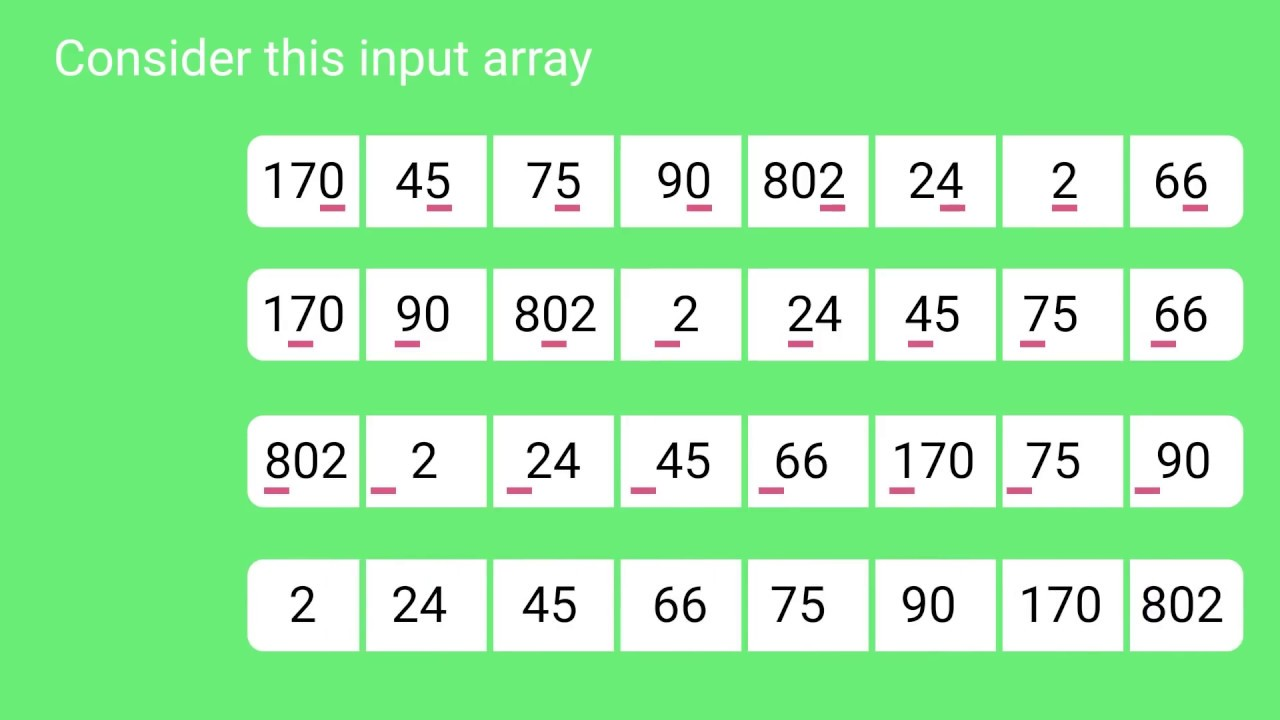

**EJEMPLO**

Consideremos el arreglo que se muestra en la imagen:

  **a = [10, 5, 1, 3, 22]**


1.  Primero agrupamos los elementos por su total de digitos.

 10: dos digitos

 5: un digito ->(05)

 1: un digito ->(01)

 3: un digito ->(03)

 22: dos digitos

2. Vamos a ordenar EL SEGUNDO DIGITO DE CADA ELEMENTO:

**a = [10, 01, 22, 03, 05]**

3. Luego ordenamos :

**a = [01, 03, 05, 10, 22]**

4. Entonces queda : 

**a = [1, 3, 5, 10, 22]**

-------------------------




3- **IMPLEMENTACIÓN DEL ALGORITMO**

In [41]:
def counting_Sort(a, exp1, verbose = False):
 
    global pasada

    n = len(a)
    output = [0] * (n)
    count = [0] * (10)
    pasada += 1


    if verbose==True and pasada==1:
      print("")
      print("Se ordenan los números de un digito: \n")
    if verbose==True and pasada==2:
      print("")
      print("Se ordenan los números de dos digitos: \n")
    if verbose==True and pasada==3: 
      print("")
      print("Se ordenan los números de tres digitos: \n")


    for i in range(0, n):
      index = a[i] // exp1
      count[index % 10] += 1


    if verbose==True:
      print("Se cuentan los elementos: ",count)    
 
    for i in range(1, 10):
      count[i] += count[i - 1]
    i = n - 1

    while i >= 0:
      index = a[i] // exp1
      output[count[index % 10] - 1] = a[i]
      count[index % 10] -= 1
      i -= 1
    i = 0

    if verbose==True: 
      print("Cambio de posiciones: ",count)

    for i in range(0, len(a)):
      a[i] = output[i]


In [11]:
def radixSort(a, verbose = False):

    max1 = max(a)
    exp = 1
    while max1 / exp >= 1:
        if verbose==True: 
          counting_Sort(a, exp,verbose=True)
        else: counting_Sort(a, exp)
        exp *= 10
    return a

In [12]:
a = [15, 5, 7, 0, 2, 24, 21, 19]

pasada = 0

print("ENTRADA: ", a, "")
radixSort(a)
print("SALIDA: ", a, "")

ENTRADA:  [15, 5, 7, 0, 2, 24, 21, 19] 
SALIDA:  [0, 2, 5, 7, 15, 19, 21, 24] 


--------------------------------------------
**EJECUCIÓN DEL ALGORITMO PASO A PASO**

Usando la opción verbose 

In [46]:
a = [10,2,8,1,5,22,3,100]
pasada = 0
print("ENTRADA: ", a)
a_ordenado = radixSort(a, verbose = True)
print("")
print("SALIDA: ", a_ordenado)

ENTRADA:  [10, 2, 8, 1, 5, 22, 3, 100]

Se ordenan los números de un digito: 

Se cuentan los elementos:  [2, 1, 2, 1, 0, 1, 0, 0, 1, 0]
Cambio de posiciones:  [0, 2, 3, 5, 6, 6, 7, 7, 7, 8]

Se ordenan los números de dos digitos: 

Se cuentan los elementos:  [6, 1, 1, 0, 0, 0, 0, 0, 0, 0]
Cambio de posiciones:  [0, 6, 7, 8, 8, 8, 8, 8, 8, 8]

Se ordenan los números de tres digitos: 

Se cuentan los elementos:  [7, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Cambio de posiciones:  [0, 7, 8, 8, 8, 8, 8, 8, 8, 8]

SALIDA:  [1, 2, 3, 5, 8, 10, 22, 100]


---------------------------

**3- PROPIEDADES DEL ALGORITMO** 

CORRECTITUD

**Teorema:**

Dado los elementos de n digitos, en los que cada digito puede tomar b valores posibles, se van a clasificar correctamente en O(d*(n+b)).

**Prueba del teorema:**

Inducción:

El analisis del tiempo de ejecucción depende de la estabilidad del ordenamiento utilizado como algortimo de clasificación intermedio. Cuando cada digito esta en el rango de 0 a b-1 y b no es muy grande, el counting termina siendo la opción mas clara.

------------------------

TIEMPO DE EJECUCIÓN

**RADIX SORT:**

El ordenamiento opera en un tiempo 0(n), donde n es el numero de claves.

El peor y mejor son también de tiempo lineal O(n) ya que Counting no compara entonces no importa la ordenación que ya tenga el arreglo, hace todas las operaciones de igual manera, solo que ahora repetidas d veces por el FOR de afuera de RadixSort.

Dados n números en los cuales cada digito puede tomar k posibles valores, Radix sort ordena correctamente los n números en O(d(n+b)), si d es constante y b =O(n).


**COUNTING SORT:**

El tiempo de ejecución promedio del Counting Sort es O(n), ya que para todos los ciclos for, tienen un tiempo de ejecución O(n), pero como siempre tienen que ejecutarse minimo una vez para ser un general de O(n).

Para todos los ciclos for, de modo tal que para el general de los casos el tiempo de ejecucion sera O(n + b), pero cuando b = 0 entonces el tiempo de ejecucion sera O(n).

--------------------
**4- EXPERIMENTOS Y ANÁLISIS**

Comparación Counting_Sort y Bucket_Sort (Tiempo de ejecución)

In [14]:
def bucketSort(alist):
    largest = max(alist)
    length = len(alist)
    size = largest/length
 
    buckets = [[] for _ in range(length)]
    for i in range(length):
        j = int(alist[i]/size)
        if j != length:
            buckets[j].append(alist[i])
        else:
            buckets[length - 1].append(alist[i])
 
    for i in range(length):
        insertionSort(buckets[i])
 
    result = []
    for i in range(length):
        result = result + buckets[i]
 
    return result

In [15]:
def insertionSort(b):
    for i in range(1, len(b)):
        up = b[i]
        j = i - 1
        while j >= 0 and b[j] > up: 
            b[j + 1] = b[j]
            j -= 1
        b[j + 1] = up     
    return b 

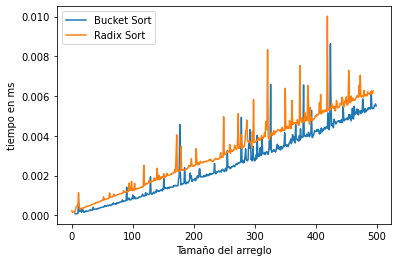

In [23]:
import matplotlib.pyplot as plt
import random
import datetime
from timeit import repeat

x=[]; y=[]; z=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

 
  t = repeat(setup="from __main__ import bucketSort", stmt=f"bucketSort({a})", repeat=1, number=10)
  h = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({a})", repeat=1, number=10)

  x.append(n)
  y.append(t)
  z.append(h)

plt.plot(x,y,z)
plt.legend(["Bucket Sort","Radix Sort"])
plt.xlabel('Tamaño del arreglo')
plt.ylabel('tiempo en ms')
plt.show()

**ANÁLISIS DE RESULTADOS**

Como podemos ver en el grafico, el algoritmo Bucket Sort es más rapido en ejecutarse que el Radix Sort. 

Sabemos que el Radix sort primero ordena los elementos agrupando dígitos por posiciones y luego ordena los elementos.

El Bucket Sort primero divide los elementos del arreglo no ordenados en grupos de cubos y luego ordena los elementos en el cubo usando un algoritmo a elección para ordenar. Dicho esto, el tiempo de ejecución del Bucket Sort depende mucho del algoritmo que se utiliza para ordenar. En este caso se esta utilizando el Insertion Sort, por ello se puede observar que el bucket es más lento, ya que el Insertion Sort tiene un tiempo de ejecución muy alto comparado con los otros algoritmos.

------------------------------------

Comparación Radix Sort e Insertion Sort (Tiempo de ejecución)

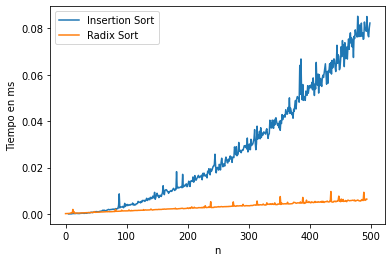

In [33]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]; z=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  size = len(a)
  t = repeat(setup="from __main__ import insertionSort", stmt=f"insertionSort({a})", repeat=1, number=10)
  e = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({a})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  z.append(e)

plt.plot(x,y,z)
plt.legend(["Insertion Sort","Radix Sort"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

**ANÁLISIS DE RESULTADOS**

Como comentamos en el anterior experimento, el Insertion Sort tiene un tiempo de ejecución muy elevado comparado a los demás algortimos de ordenamiento, y en este caso, al comparar el Radix y el Insertion, se demuestra que es correcta esa afirmación. Además el Radix Sort tiene un tiempo de ejecución O(d*(n+b)) y el insertion Sort en el peor de los casos O(n^2).